In [1]:
#importing all the needed libraries 
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller


In [2]:
#parser function to parse our date column into required format
def parser(x):
  try:
    # Parse date in 'M/D/YY' format
    date = datetime.strptime(x,'%m/%d/%y')
    
    # Return date in 'YY-M' format
    return date.strftime('%y-%m')
    
  except ValueError:
    # Return NaN if date can't be parsed
    return np.nan

In [3]:
df = read_csv('data_daily.csv', parse_dates=[0], squeeze=True, date_parser=parser)
print(df.head())

    Date  Receipt_Count
0  21-01        7564766
1  21-01        7455524
2  21-01        7095414
3  21-01        7666163
4  21-01        7771289


In [4]:
df.columns

Index(['Date', 'Receipt_Count'], dtype='object')

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%y-%m')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

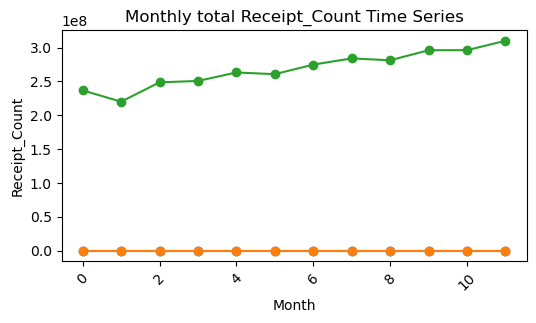

In [6]:
#creating a new data frame with column that has total receipts per month
df_monthly = df.groupby(['Year', 'Month'])['Receipt_Count'].sum().reset_index()
#plotting the time series graph
plt.figure(figsize=(6,3))
plt.plot(df_monthly.index, df_monthly.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Receipt_Count')
plt.title('Monthly total Receipt_Count Time Series')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()


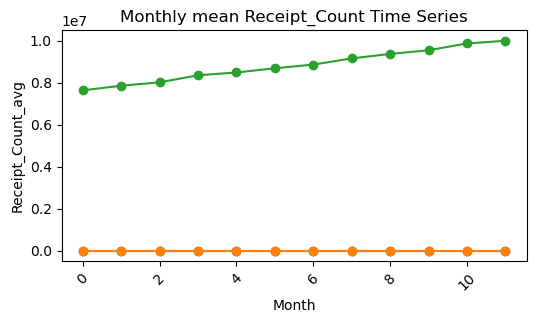

In [7]:
#creating a new data frame with column that has average number of receipts per month

df_monthly_avg = df.groupby(['Year', 'Month'])['Receipt_Count'].mean().reset_index()
#mean instead of sum to better explain any seasonality data might have

plt.figure(figsize=(6, 3))
plt.plot(df_monthly_avg.index, df_monthly_avg.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Receipt_Count_avg')
plt.title('Monthly mean Receipt_Count Time Series')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

In [8]:
df_monthly_avg.head()

,Year,Month,Receipt_Count
0,2021,1,7.636667e+06
1,2021,2,7.858338e+06
2,2021,3,8.019633e+06
3,2021,4,8.354828e+06
4,2021,5,8.488766e+06


In [9]:
df_monthly_avg.set_index('Month',inplace=True)

In [10]:
df_monthly_avg.head()

,Year,Receipt_Count
Month,,
1,2021,7.636667e+06
2,2021,7.858338e+06
3,2021,8.019633e+06
4,2021,8.354828e+06
5,2021,8.488766e+06


In [11]:
df_monthly_avg = df_monthly_avg.drop(['Year'], axis=1)

In [12]:
df_monthly_avg.head()

,Receipt_Count
Month,
1,7.636667e+06
2,7.858338e+06
3,8.019633e+06
4,8.354828e+06
5,8.488766e+06


In [13]:
# Testing for stationarity

#Determining d value from Perform Augmented Dickey-Fuller Test: 
#This statistical test helps determine whether differencing is needed to make the series stationary. 
#The null hypothesis of this test is that the time series is non-stationary. 
#If the p-value is less than a significance level (e.g., 0.05), you can reject the null hypothesis
#and consider the series as stationary. If the p-value is higher, differencing is likely necessary.

test_results=adfuller(df_monthly_avg['Receipt_Count'])

#H0: It is non stationary
#H1: It is stationary def adfuller_test(sales):

def adfuller_test(receipts):
    result=adfuller (receipts)
    labels = ['ADF Test Statistic', 'p-value', ' #Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print (label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis (Ho), reject the null hypothesis")
    else:     
        print ("weak evidence against null hypothesis, time series has a unit root")


In [14]:
adfuller_test(df_monthly_avg['Receipt_Count'])

ADF Test Statistic : 2.177327301368124
p-value : 0.9988633257911941
 #Lags Used : 4
Number of Observations Used : 7
weak evidence against null hypothesis, time series has a unit root


In [15]:
#Differencing

df_monthly_avg['Receipt_Count_difference_1'] = df_monthly_avg['Receipt_Count'] - df_monthly_avg['Receipt_Count'].shift(1)


In [18]:
#test again Dickey-Fuller Test:
adfuller_test(df_monthly_avg['Receipt_Count_difference_1'].dropna())

ADF Test Statistic : -5.822659831608841
p-value : 4.1480591898880187e-07
 #Lags Used : 0
Number of Observations Used : 10
strong evidence against the null hypothesis (Ho), reject the null hypothesis


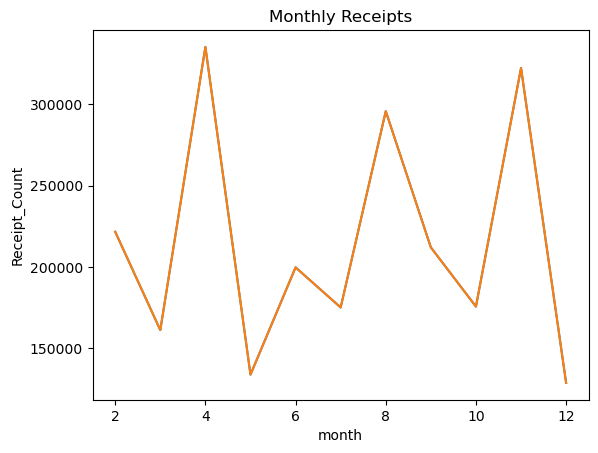

In [20]:
df_monthly_avg['Receipt_Count_difference_1'].plot()

# Time series plot
plt.xlabel('month')
plt.ylabel('Receipt_Count')
plt.title('Monthly Receipts')
plt.show()

In [ ]:
# Autocorrelation and partial autocorrelation
#finding p-AR model, d differencing, q MA lags

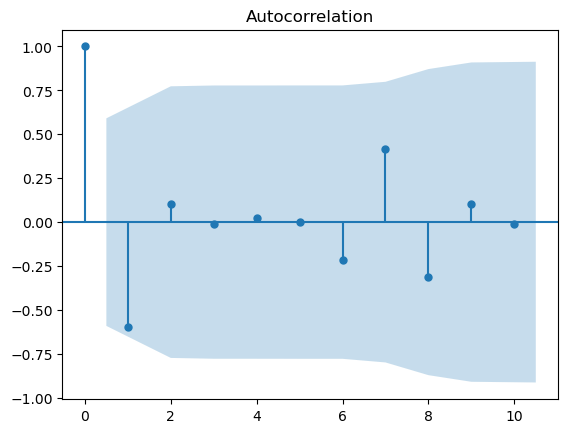

In [23]:
# Create ACF plot
plot_acf(df_monthly_avg['Receipt_Count_difference_1'].dropna()) 
#value of MA/q value as 0


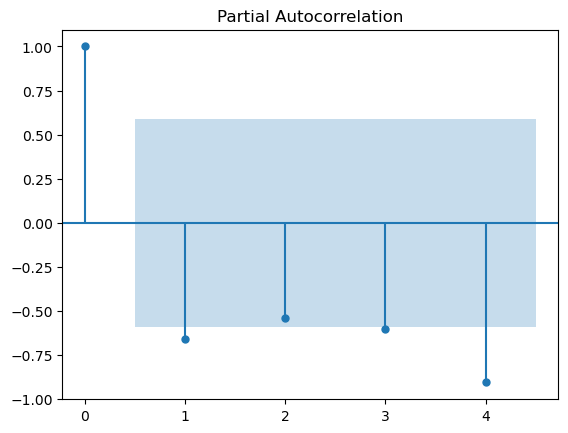

In [25]:
# Create PACF plot
plot_pacf(df_monthly_avg['Receipt_Count_difference_1'].dropna(), lags=4) 
#p value is 1

In [26]:
ARIMA_model = ARIMA(df_monthly_avg['Receipt_Count_difference_1'], order=(1,1,0))  # Set the appropriate p, d, q values
model_fit = ARIMA_model.fit()

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Receipt_Count_difference_1   No. Observations:                   12
Model:                         ARIMA(1, 1, 0)   Log Likelihood                -143.091
Date:                        Thu, 19 Oct 2023   AIC                            290.181
Time:                                21:52:20   BIC                            290.977
Sample:                                     0   HQIC                           289.680
                                         - 12                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6760      0.250     -2.705      0.007      -1.166      -0.186
sigma2      7.762e+09   1.47e-12   5.29e+21      0.000    7.76e+09    7.76e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.34   Prob(JB):                         0.64
Heteroskedasticity (H):               0.49   Skew:                             0.33
Prob(H) (two-sided):                  0.51   Kurtosis:                         1.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.7e+38. Standard errors may be unstable.
"""

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


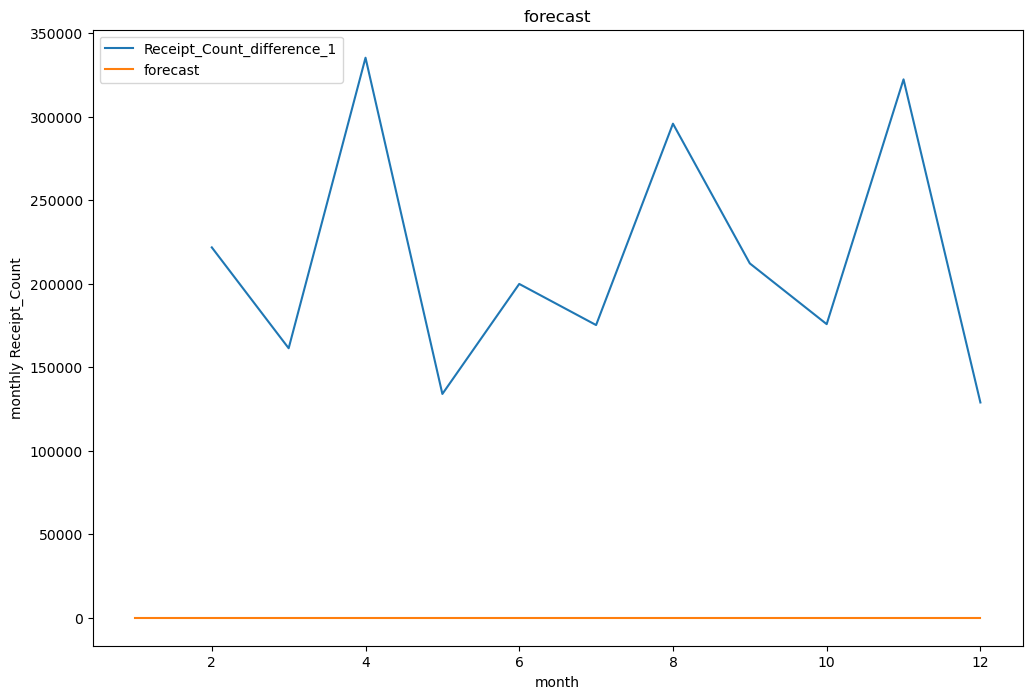

In [36]:
df_monthly_avg['forecast']=model_fit.predict(start=1, end=12,dynamic=True)
df_monthly_avg[['Receipt_Count_difference_1','forecast']].plot(figsize=(12,8))
plt.xlabel('month')
plt.ylabel('monthly Receipt_Count')
plt.title('forecast')
plt.show()

In [37]:
import statsmodels.api as sm

In [86]:
model=sm.tsa.statespace.SARIMAX(df_monthly_avg['Receipt_Count_difference_1'],order=(1,1,1),seasonal_order=(1,1,1,4))
result=model.fit()

# I tried different seasonality and 4 gives the best result among all

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('To

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


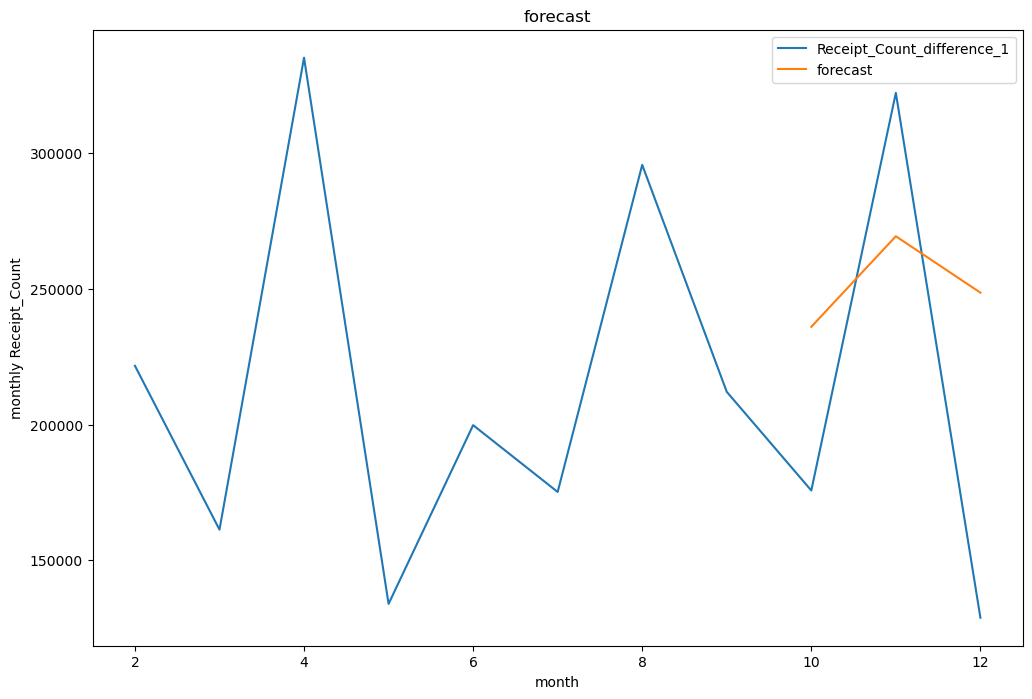

In [87]:
df_monthly_avg['forecast']=result.predict(start=10, end=12,dynamic=True)
df_monthly_avg[['Receipt_Count_difference_1','forecast']].plot(figsize=(12,8))
plt.xlabel('month')
plt.ylabel('monthly Receipt_Count')
plt.title('forecast')
plt.show()

In [109]:
from pandas.tseries.offsets import DateOffset
future_months = pd.date_range(start='2022-01-01', end='2022-12-01', freq='MS') 


In [124]:
future_datest_df=pd.DataFrame (index=future_months[1:],columns=df.columns)


In [125]:
future_datest_df.tail ()

,Date,Receipt_Count,Month,Year
2022-08-01,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN
2022-11-01,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN


In [126]:
future_df=pd.concat([df_monthly_avg,future_datest_df])

In [127]:
future_df.tail()

,Receipt_Count,Receipt_Count_difference_1,forecast,Date,Month,Year
2022-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
future_df['forecast']=result.predict(start='2022-01-01', end='2022-12-01',dynamic=True)
future_df[['Receipt_Count_difference_1','forecast']].plot(figsize=(12,8))

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
model2 = ExponentialSmoothing(df['Receipt_Count'])
model_fit2 = model2.fit()

In [ ]:
future_months = pd.date_range(start='2022-01-01', end='2022-12-01', freq='MS') 

arima_pred = model_fit.forecast(steps=len(future_months))
hw_pred = model_fit2.forecast(steps=len(future_months))

In [ ]:
# Calculate MSE
arima_mse = mean_squared_error(df['Receipt_Count'], train_arima_pred) 
hw_mse = mean_squared_error(df['Receipt_Count'], train_hw_pred)
mse = np.mean((y_pred - y_test)**2)

In [ ]:
model = ARIMA(df['Receipt_Count'], order=(1,2,1))  
model_fit = model.fit()

In [ ]:
df['Receipt_Count_difference_1'] = df['Receipt_Count'] - df['Receipt_Count'].shift(1)
df['Receipt_Count_difference_1'].iloc[0] = df['Receipt_Count'].iloc[0]

# Get actual values
y_true = df['Receipt_Count_difference_1']

# Get ARIMA predictions 
y_pred_arima = model_fit.forecast(steps=len(y_true))

# Calculate MSE
MSE = 0
for i in range(len(y_true)):
  MSE += (y_true[i] - y_pred_arima[i])**2
MSE = MSE/len(y_true)

print("ARIMA MSE:", MSE)


In [ ]:
# Second-order differencing
df['Receipt_Count_difference_2'] = df['Receipt_Count_difference_1'] - df['Receipt_Count_difference_1'].shift(1)
df['Receipt_Count_difference_2'].iloc[0] = df['Receipt_Count_difference_1'].iloc[0]

# Get actual values
y_true = df['Receipt_Count_difference_2']

# Get ARIMA predictions 
y_pred_arima = model_fit.forecast(steps=len(y_true))

# Calculate MSE
MSE = 0
for i in range(len(y_true)):
  MSE += (y_true[i] - y_pred_arima[i])**2
MSE = MSE/len(y_true)

print("ARIMA MSE:", MSE)

In [ ]:
# Get actual values
y_true = df['Receipt_Count']

# Get ARIMA predictions 
y_pred_arima = model_fit.forecast(steps=len(y_true))

# Calculate MSE
MSE = 0
for i in range(len(y_true)):
  MSE += (y_true[i] - y_pred_arima[i])**2
MSE = MSE/len(y_true)

print("ARIMA MSE:", MSE)


In [ ]:

# Repeat for Holt-Winters
y_pred_hw = model_fit2.forecast(steps=len(y_true))

MSE = 0
for i in range(len(y_true)):
  MSE += (y_true[i] - y_pred_hw[i])**2  
MSE = MSE/len(y_true)

print("Holt-Winters MSE:", MSE)